In [85]:
%matplotlib notebook

In [86]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# Read csv and create a dataframe
crimedata = r"\Users\Menard\Desktop\MenardC\Resources\crime-data-from-2010-to-present.csv"
crimecsv=pd.read_csv(crimedata)
crimecsv.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


In [88]:
# For this block of code I am getting the count of times each crime description occured per area
crimepa=crimecsv['Crime Code Description'].value_counts()
crimearea = crimecsv.groupby(['Area Name','Crime Code Description'])['Crime Code Description'].count().reset_index(name='Count')
crimearea

,Area Name,Crime Code Description,Count
0,77th Street,ARSON,332
1,77th Street,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,135
2,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",11127
3,77th Street,ATTEMPTED ROBBERY,1246
4,77th Street,BATTERY - SIMPLE ASSAULT,14497
...,...,...,...
2573,Wilshire,VEHICLE - STOLEN,4612
2574,Wilshire,VIOLATION OF COURT ORDER,615
2575,Wilshire,VIOLATION OF RESTRAINING ORDER,582
2576,Wilshire,VIOLATION OF TEMPORARY RESTRAINING ORDER,47


In [89]:
# Since the areas are getting stacked per crime, I summed the total counts for all the crimes per area for better visual.
total_crimes_per_area = crimearea.groupby(['Area Name'])['Count'].sum().reset_index(name='Total Count')
total_crimes_per_area

,Area Name,Total Count
0,77th Street,137513
1,Central,90489
2,Devonshire,91347
3,Foothill,75348
4,Harbor,86972
5,Hollenbeck,73514
6,Hollywood,92742
7,Mission,98395
8,N Hollywood,107707
9,Newton,94123


In [90]:
# Once all the crimes within the area are counted and grouped. I then want to look at the percentage of crimes that occured 
# in 77th street since the area has the highest crime count.

# Filter data for only 77th Street
crimes_77th_street = crimecsv[crimecsv['Area Name'] == '77th Street']

# Group by Crime Code Description and get the count
crime_counts = crimes_77th_street.groupby('Crime Code Description')['Crime Code Description'].count()

# Get the total number of crimes in 77th Street
total_crimes = crime_counts.sum()

# Calculate the percentage of each crime in 77th Street
crime_percentages = crime_counts / total_crimes * 100

print(crime_percentages)

Crime Code Description
ARSON                                              0.241432
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER       0.098173
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     8.091599
ATTEMPTED ROBBERY                                  0.906096
BATTERY - SIMPLE ASSAULT                          10.542276
                                                    ...    
VEHICLE - STOLEN                                   8.911885
VIOLATION OF COURT ORDER                           1.110440
VIOLATION OF RESTRAINING ORDER                     1.106077
VIOLATION OF TEMPORARY RESTRAINING ORDER           0.053813
WEAPONS POSSESSION/BOMBING                         0.007272
Name: Crime Code Description, Length: 128, dtype: float64


In [91]:
# Since there are 128 different crime description. I want to narrow it down to the top 5 crime 
# description that occured.

# Get the top 5 crimes in 77th Street
top_5_crimes = crime_percentages.nlargest(5)
print(top_5_crimes)

Crime Code Description
BATTERY - SIMPLE ASSAULT                          10.542276
VEHICLE - STOLEN                                   8.911885
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     8.091599
ROBBERY                                            7.072059
BURGLARY                                           6.729546
Name: Crime Code Description, dtype: float64


C:\Users\Menard\AppData\Local\Temp\ipykernel_42400\1096245135.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_crimes = top_5_crimes.append(pd.Series({'Other': other_crimes}))


<IPython.core.display.Javascript object>


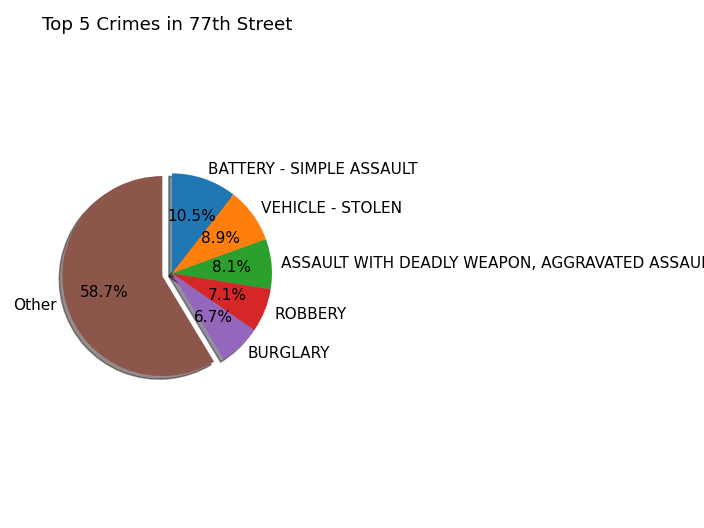

In [92]:
# When plotting a pi chart I want the pieces to be accurate in order to do this I had to combine the
# other crime descriptions that are not within the top 5 into one whole category becase we only want
# to focus on the top 5 crimes.

# Get the percentage of all other crimes
# In order to get the percentage of the other crime I used the '~' symbol to negate the results of
# the isin method (top 5).
other_crimes = crime_percentages[~crime_percentages.index.isin(top_5_crimes.index)].sum()

# Add the other crimes to the top_5_crimes DataFrame
top_5_crimes = top_5_crimes.append(pd.Series({'Other': other_crimes}))

# Create a list of explode values
explode = [0] * len(top_5_crimes)
# Offseting the 'Other slice'
explode[-1] = 0.1

# Pie chart
plt.pie(top_5_crimes, labels=top_5_crimes.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True, explode=explode)
plt.axis('equal')
plt.title("Top 5 Crimes in 77th Street")
plt.tight_layout()
plt.show()

In [96]:
# For the next analysis, I wanted to go more in depth. I wanted to see what the crime description 
# occurs the most per area.

# Get unique values of area names
areas = crimecsv['Area Name'].unique()

# Creating a dictionary placeholder for results in the if conditional
highest_crime = {}

# Loop through each area
for area in areas:
    # Filter data for only the current area
    crimes_area = crimecsv[crimecsv['Area Name'] == area]
    
    # Group by Crime Code Description and get the count
    crime_counts = crimes_area.groupby('Crime Code Description')['Crime Code Description'].count()
    
    # Get the total number of crimes in the area
    total_crimes = crime_counts.sum()
    
    # Calculate the percentage of each crime in the area
    crime_percentages = crime_counts / total_crimes * 100
    
    # Get the highest crime in the area
    highest_crime_in_area = crime_percentages.idxmax()
    
    # Store the highest crime in the dictionary
    highest_crime[area] = highest_crime_in_area

highest_crime

{'Olympic': 'BATTERY - SIMPLE ASSAULT',
 'Southeast': 'BATTERY - SIMPLE ASSAULT',
 'Northeast': 'VEHICLE - STOLEN',
 'Foothill': 'VEHICLE - STOLEN',
 'Mission': 'VEHICLE - STOLEN',
 'Newton': 'VEHICLE - STOLEN',
 'West Valley': 'BURGLARY',
 '77th Street': 'BATTERY - SIMPLE ASSAULT',
 'Pacific': 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'N Hollywood': 'BURGLARY FROM VEHICLE',
 'Topanga': 'BURGLARY',
 'Devonshire': 'BURGLARY',
 'Rampart': 'BATTERY - SIMPLE ASSAULT',
 'Central': 'BATTERY - SIMPLE ASSAULT',
 'Southwest': 'BATTERY - SIMPLE ASSAULT',
 'Hollenbeck': 'VEHICLE - STOLEN',
 'Hollywood': 'BATTERY - SIMPLE ASSAULT',
 'Harbor': 'VEHICLE - STOLEN',
 'West LA': 'BURGLARY',
 'Wilshire': 'BURGLARY',
 'Van Nuys': 'BURGLARY FROM VEHICLE'}

In [97]:
# Once I have the area name, the crime description that mostly occured within the respective area.
# I then wanted to know the percentage of each area's highest crime in relation to the total crimes
# per area.

# Grouping the data by area and get the total count of crimes per area
total_crimes_per_area = crimecsv.groupby('Area Name')['Crime Code Description'].count()

# Creating an empty dictionary for storing the results.
highest_crime_per_area = {}

# Loop through each area and build dictionary
for area in total_crimes_per_area.index:
    # Filter the data for only the current area
    crimes_per_area = crimecsv[crimecsv['Area Name'] == area]
    
    # Group the data by Crime Code Description and get the count
    crime_counts = crimes_per_area.groupby('Crime Code Description')['Crime Code Description'].count()
    
    # Getting the highest crime in the current area
    highest_crime = crime_counts.idxmax()
    
    # Getting the count of the highest crime in the current area
    highest_crime_count = crime_counts.max()
    
    # Calculating the percentage of the highest crime in the current area
    highest_crime_percentage = highest_crime_count / total_crimes_per_area[area] * 100
    
    # Adding the highest crime information to the dictionary
    highest_crime_per_area[area] = {
        'Highest Crime': highest_crime,
        'Count': highest_crime_count,
        'Percentage': highest_crime_percentage}
    
# Converting the dictionary to a pandas DataFrame
highest_crime_per_area = pd.DataFrame.from_dict(highest_crime_per_area, orient='index')

print(highest_crime_per_area)

                                  Highest Crime  Count  Percentage
77th Street            BATTERY - SIMPLE ASSAULT  14497   10.542276
Central                BATTERY - SIMPLE ASSAULT  13714   15.155433
Devonshire                             BURGLARY   9269   10.147022
Foothill                       VEHICLE - STOLEN   7712   10.235175
Harbor                         VEHICLE - STOLEN   9179   10.553971
Hollenbeck                     VEHICLE - STOLEN   9234   12.560873
Hollywood              BATTERY - SIMPLE ASSAULT   9945   10.723297
Mission                        VEHICLE - STOLEN   9441    9.595000
N Hollywood               BURGLARY FROM VEHICLE  11603   10.772745
Newton                         VEHICLE - STOLEN  10782   11.455223
Northeast                      VEHICLE - STOLEN   8618    9.079990
Olympic                BATTERY - SIMPLE ASSAULT  10397   11.599393
Pacific      THEFT PLAIN - PETTY ($950 & UNDER)  11750   11.121102
Rampart                BATTERY - SIMPLE ASSAULT   8992   10.67

<IPython.core.display.Javascript object>


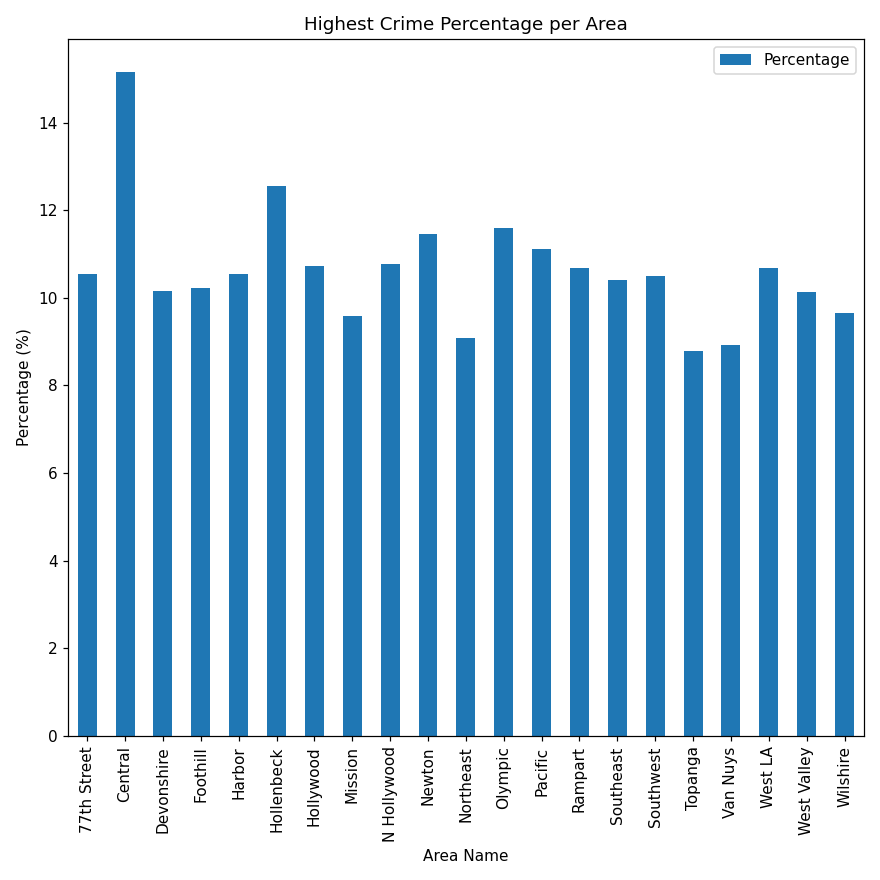

In [98]:
# Get the total number of crimes per area and create an empty list to store results.
total_crimes_per_area = crimecsv.groupby(['Area Name'])['Area Name'].count()
highest_crime_per_area = []

# Loop through each area
for area in total_crimes_per_area.index:
    # Filter data for the specific area
    crimes_in_area = crimecsv[crimecsv['Area Name'] == area]
    
    # Group by Crime Code Description and get the count
    crime_counts = crimes_in_area.groupby('Crime Code Description')['Crime Code Description'].count()
    
    # Get the highest crime in the area
    highest_crime = crime_counts.idxmax()
    
    # Calculate the percentage of the highest crime in the area
    highest_crime_percentage = crime_counts[highest_crime] / total_crimes_per_area[area] * 100
    
    # Append the highest crime and its percentage to the list
    highest_crime_per_area.append((area, highest_crime, highest_crime_percentage))

# Converting to a Dataframe
highest_crime_per_area = pd.DataFrame(highest_crime_per_area, columns=['Area Name', 'Highest Crime', 'Percentage'])

# Plot
highest_crime_per_area.plot(kind='bar', x='Area Name', y='Percentage', figsize=(8, 8))

# Label
plt.title('Highest Crime Percentage per Area')
plt.xlabel('Area Name')
plt.ylabel('Percentage (%)')
plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


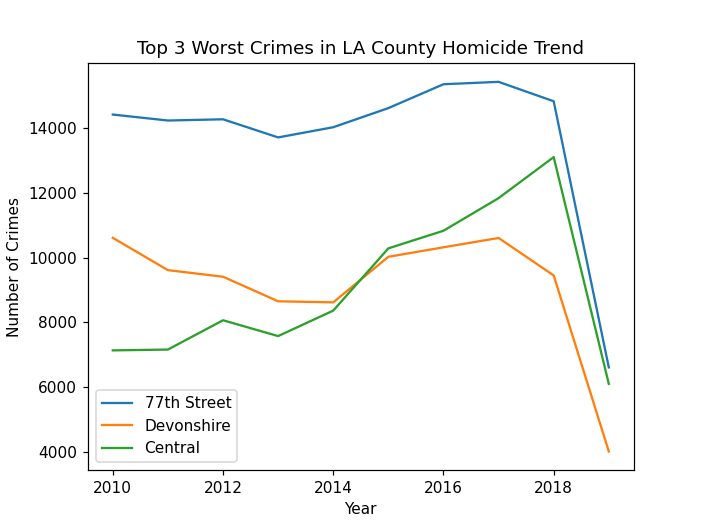

In [118]:
# Filter the data for only 77th street, Central and Devonshire
crimecsv_77th_street = crimecsv[crimecsv['Area Name'] == '77th Street']
crimecsv_devonshire = crimecsv[crimecsv['Area Name'] == 'Devonshire']
crimecsv_central = crimecsv[crimecsv['Area Name'] == 'Central']


# Group the data by year and get the count
crime_count_per_year_77th_street = crimecsv_77th_street.groupby(crimecsv_77th_street['Date Occurred'].dt.year)['Date Occurred'].count()
crime_count_per_year_devonshire = crimecsv_devonshire.groupby(crimecsv_devonshire['Date Occurred'].dt.year)['Date Occurred'].count()
crime_count_per_year_central = crimecsv_central.groupby(crimecsv_central['Date Occurred'].dt.year)['Date Occurred'].count()


# Plot the number of crimes each year on a line chart
plt.plot(crime_count_per_year_77th_street.index, crime_count_per_year_77th_street.values, label='77th Street')
plt.plot(crime_count_per_year_devonshire.index, crime_count_per_year_devonshire.values, label='Devonshire')
plt.plot(crime_count_per_year_central.index, crime_count_per_year_central.values, label='Central')


# Add labels and title to the graph
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title("Top 3 Worst Crimes in LA County Homicide Trend")
plt.legend()

# Show the graph
plt.show()

In [119]:
# To go even further in depth, I wanted to look at homicide rates per area. So I got the count
# of each occurance per area.

# Filter only homicide crimes
homicide_crimes = crimecsv[crimecsv['Crime Code'] == 110]

# Group by area and get the count
homicide_count_per_area = homicide_crimes.groupby(['Area Name'])['Area Name'].count()

print(homicide_count_per_area)

Area Name
77th Street    422
Central         98
Devonshire      39
Foothill       111
Harbor         156
Hollenbeck     157
Hollywood       66
Mission        128
N Hollywood     76
Newton         229
Northeast       86
Olympic         79
Pacific         48
Rampart        139
Southeast      363
Southwest      212
Topanga         36
Van Nuys        58
West LA         24
West Valley     52
Wilshire        55
Name: Area Name, dtype: int64


In [120]:
# Calculate the percentage of homicide crimes per area
homicide_percentage_per_area = (homicide_count_per_area / total_crimes_per_area) * 100
print(homicide_percentage_per_area)

Area Name
77th Street    0.306880
Central        0.108300
Devonshire     0.042694
Foothill       0.147316
Harbor         0.179368
Hollenbeck     0.213565
Hollywood      0.071165
Mission        0.130088
N Hollywood    0.070562
Newton         0.243299
Northeast      0.090610
Olympic        0.088136
Pacific        0.045431
Rampart        0.165003
Southeast      0.345372
Southwest      0.165481
Topanga        0.039019
Van Nuys       0.061468
West LA        0.028662
West Valley    0.061523
Wilshire       0.066606
dtype: float64


<IPython.core.display.Javascript object>


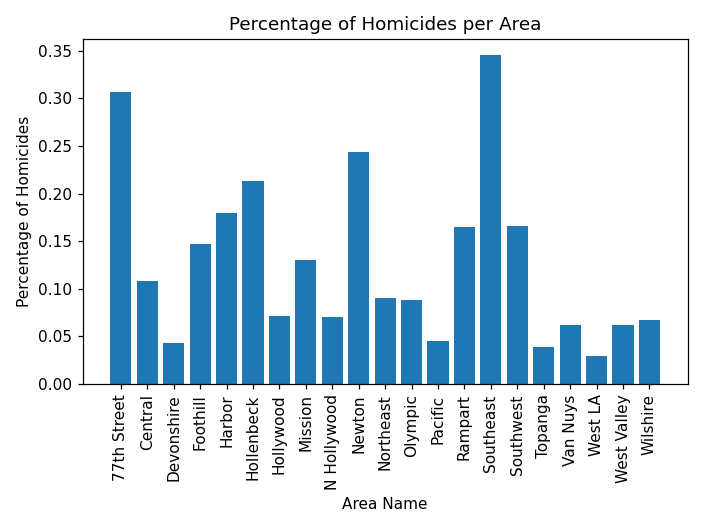

In [121]:
# Calculate the percentage of homicide crimes per area
homicide_percentage_per_area = (homicide_count_per_area / total_crimes_per_area) * 100

# Plotting the percentage of homicides per area.
plt.bar(homicide_percentage_per_area.index, homicide_percentage_per_area.values)

# Add labels and title
plt.xlabel("Area Name")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Homicides")
plt.title("Percentage of Homicides per Area")
plt.tight_layout()

# Show the plot
plt.show()

In [122]:
# I then want to get a visual of the crime trend througout the years to see what year the crimes occured
# the most.

# Converting the 'Date Occurred' column to a datetime type
crimecsv['Date Occurred'] = pd.to_datetime(crimecsv['Date Occurred'])

# Extracting the month from the 'Date Occurred' column
crimecsv['Month'] = crimecsv['Date Occurred'].dt.month

# Filtering only crimes that occured in October
october_crimes = crimecsv[crimecsv['Month'] == 10]

# Group by year and get the count
crimes_per_year = october_crimes.groupby(october_crimes['Date Occurred'].dt.year)['Date Occurred'].count()

print(crimes_per_year)

Date Occurred
2010    17580
2011    17011
2012    17208
2013    16215
2014    17274
2015    19136
2016    19576
2017    20304
2018    19317
Name: Date Occurred, dtype: int64


<IPython.core.display.Javascript object>


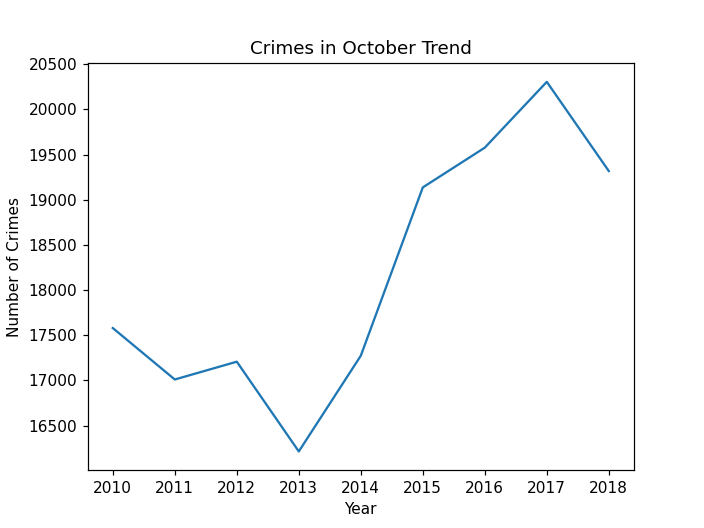

In [123]:
# Plot the data
plt.plot(crimes_per_year.index, crimes_per_year.values)

# Add labels and title to the graph
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title("Crimes in October Trend")

# Show the graph
plt.show()

In [124]:
# Now to get the crime count per area within the month of October. October because I wanted to see
# how many homicides were comitted in halloween. This block of code is only getting the total crimes
# per area in the month of October.

# Group by year and area and get the count
crimes_per_year_per_area = october_crimes.groupby([october_crimes['Date Occurred'].dt.year, 'Area Name'])['Date Occurred'].count()

# Unstacking for better visual.
crimes_per_year_per_area = crimes_per_year_per_area.unstack()
print(crimes_per_year_per_area)

Area Name      77th Street  Central  Devonshire  Foothill  Harbor  Hollenbeck  \
Date Occurred                                                                   
2010                  1122      667         867       704     795         648   
2011                  1278      609         862       673     805         527   
2012                  1171      648         807       657     773         655   
2013                  1150      651         780       593     681         537   
2014                  1315      719         770       535     714         687   
2015                  1233      916         866       733     835         783   
2016                  1287      929         919       665     871         765   
2017                  1353     1111         881       736     757         804   
2018                  1256     1174         776       690     731         742   

Area Name      Hollywood  Mission  N Hollywood  Newton  ...  Olympic  Pacific  \
Date Occurred              

In [114]:
# Now to get the percentage of homicides per year to get somewhat of a numeric comparison in relation
# to the total crimes or other crimes.

# Calculate the percentage of homicide crimes per year
homicide_percentage_per_year = (homicide_count_per_year / crimes_per_year) * 100
print(homicide_percentage_per_year)

Date Occurred
2010    0.130830
2011    0.164599
2012    0.139470
2013    0.067838
2014    0.109992
2015    0.109741
2016    0.194115
2017    0.137904
2018    0.129420
Name: Date Occurred, dtype: float64


In [38]:
# Convert the 'Date Occurred' column to a datetime type
crimecsv['Date Occurred'] = pd.to_datetime(crimecsv['Date Occurred'])

# Extract the day and month from the 'Date Occurred' column
crimecsv['Day'] = crimecsv['Date Occurred'].dt.day
crimecsv['Month'] = crimecsv['Date Occurred'].dt.month

# Filter only crimes that occured on October 31st
october_31st_crimes = crimecsv[(crimecsv['Month'] == 10) & (crimecsv['Day'] == 31)]

# Filter only homicides (crime code 110)
october_31st_homicides = october_31st_crimes[october_31st_crimes['Crime Code'] == 110]

# Group by year and get the count
homicide_count_per_year = october_31st_homicides.groupby(october_31st_homicides['Date Occurred'].dt.year)['Date Occurred'].count()

print(homicide_count_per_year)

Date Occurred
2010    3
2011    1
2012    2
2016    3
2018    2
Name: Date Occurred, dtype: int64


In [39]:
homicide_count_per_year_per_area = october_31st_homicides.groupby([october_31st_homicides['Date Occurred'].dt.year, 'Area Name'])['Date Occurred'].count()

print(homicide_count_per_year_per_area)

Date Occurred  Area Name  
2010           77th Street    1
               Hollenbeck     2
2011           Newton         1
2012           Foothill       1
               Harbor         1
2016           77th Street    1
               Newton         2
2018           77th Street    2
Name: Date Occurred, dtype: int64
